<a href="https://colab.research.google.com/github/talkin24/AI_POSCO/blob/master/VGG16_0_88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

device: gpu
Files already downloaded and verified
Files already downloaded and verified
len(train_data):  50000
len(test_data):  10000
data tensor([[[0.2314, 0.2431, 0.2471],
         [0.1686, 0.1804, 0.1765],
         [0.1961, 0.1882, 0.1686],
         ...,
         [0.6196, 0.5176, 0.4235],
         [0.5961, 0.4902, 0.4000],
         [0.5804, 0.4863, 0.4039]],

        [[0.0627, 0.0784, 0.0784],
         [0.0000, 0.0000, 0.0000],
         [0.0706, 0.0314, 0.0000],
         ...,
         [0.4824, 0.3451, 0.2157],
         [0.4667, 0.3255, 0.1961],
         [0.4784, 0.3412, 0.2235]],

        [[0.0980, 0.0941, 0.0824],
         [0.0627, 0.0275, 0.0000],
         [0.1922, 0.1059, 0.0314],
         ...,
         [0.4627, 0.3294, 0.1961],
         [0.4706, 0.3294, 0.1961],
         [0.4275, 0.2863, 0.1647]],

        ...,

        [[0.8157, 0.6667, 0.3765],
         [0.7882, 0.6000, 0.1333],
         [0.7765, 0.6314, 0.1020],
         ...,
         [0.6275, 0.5216, 0.2745],
         [0.21

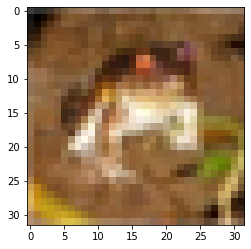

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

# hypter parameter setting
learning_rate = 1e-4
training_epochs = 100
display_step = 10
batch_size = 32
momentum = 0.9

dropout_rate = 0.3
activation = nn.ReLU()
max_pool = nn.MaxPool2d(2,2) # kerel size, stride size, padding size 

# load data
train_data = dataset.CIFAR10("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.CIFAR10("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
x_train = np.transpose(x_train, (1, 2, 0))

print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train)
plt.show()

data shape: torch.Size([32, 3, 32, 32])
label: tensor([3, 5, 3, 5, 7, 7, 4, 5, 9, 5, 8, 5, 7, 0, 5, 5, 5, 5, 1, 9, 6, 0, 4, 3,
        6, 3, 9, 5, 8, 1, 2, 5])


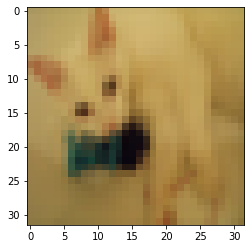

In [0]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

check_image = example_data[0]
check_image = np.transpose(check_image, (1, 2, 0))

plt.figure()
plt.imshow(check_image)
plt.show()

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(
            nn.Conv2d(3, 64, 3,1,1), # number of input channel, number of output channel, kernel size   
            nn.BatchNorm2d(64),
            activation,          # we can set stride size and padding size. if we do not set the these parameters, default value is 1, 0.
            nn.Dropout(dropout_rate),
            nn.Conv2d(64, 64,3,1,1),
            nn.BatchNorm2d(64),
            activation,
            nn.Dropout(dropout_rate), 
            # max_pool, # 16

            nn.Conv2d(64,128,3,1,1),
            nn.BatchNorm2d(128),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(128,128,3,1,1),
            nn.BatchNorm2d(128),
            activation,
            nn.Dropout(dropout_rate),
            max_pool, # 8

            nn.Conv2d(128,256,3,1,1),
            nn.BatchNorm2d(256),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(256,256,3,1,1),
            nn.BatchNorm2d(256),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(256,256,3,1,1),
            nn.BatchNorm2d(256),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(256,256,3,1,1),
            nn.BatchNorm2d(256),
            activation,
            nn.Dropout(dropout_rate),
            max_pool, # 4

            nn.Conv2d(256,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            # max_pool, #2

            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            nn.Conv2d(512,512,3,1,1),
            nn.BatchNorm2d(512),
            activation,
            nn.Dropout(dropout_rate),
            max_pool #1
            )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 4 * 4, 100),
            nn.BatchNorm1d(100),
            activation,
            # nn.Dropout(dropout_rate),
            # nn.Linear(4096, 4096),
            # nn.BatchNorm1d(4096),
            # activation,
            # nn.Dropout(dropout_rate),
            # nn.Linear(4096, 1000),
            # nn.BatchNorm1d(1000),
            # activation,
            nn.Dropout(dropout_rate),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        extracted_feature = self.feature_extraction(x) # [32, 64, 4, 4]
        flatten = extracted_feature.view(batch_size, -1) # [32, 64 * 4 * 4]
        result = self.classifier(flatten)
        return result

def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform(m.weight)
    m.bias.data.fill_(0.01)


model = CNN().to(device)
model.apply(init_weights)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:102: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


In [0]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma = 0.99)

loss_array = []

# train the model
for i in range(training_epochs+1):
    scheduler.step()
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


0 epoch loss: 1.661881446838379
10 epoch loss: 0.4855481684207916
20 epoch loss: 0.15928326547145844
30 epoch loss: 0.11615090817213058
40 epoch loss: 0.08162607997655869
50 epoch loss: 0.03321164846420288
60 epoch loss: 0.005441710352897644
70 epoch loss: 0.00864669680595398
80 epoch loss: 0.02957656979560852
90 epoch loss: 0.0021055787801742554
100 epoch loss: 0.0011740028858184814


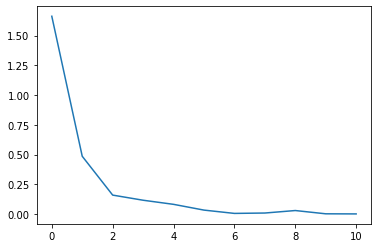

In [0]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [0]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

        test_accuracy = correct/total

    print("Test accuracy: {}".format(test_accuracy))
    # Test accuracy: 0.8232171535491943

Test accuracy: 0.8865184187889099
